# 남이 만든 CNN! (Pretrained CNN)
---
## 쉽지만 중요한 코너!
## 이미 **'잘 만들어진'** 모델들을 가져다가 사용해보자.

- [이 링크를 참고해보자](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

## Library Loading

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import numpy as np
import matplotlib.pyplot as plt

## Load **Pretrained** Model

- **"잘 만들어진"** 모델 바로 가져오기!

In [2]:
model = VGG16(include_top=True,       # VGG16 모델의 아웃풋 레이어까지 전부 불러오기
              weights='imagenet',     # ImageNet 데이터를 기반으로 학습된 가중치 불러오기
              input_shape=(224,224,3) # 모델에 들어가는 데이터의 형태
              )

553467096/553467096 [==============================] - 6s 0us/step


In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
from tensorflow.keras.utils import plot_model

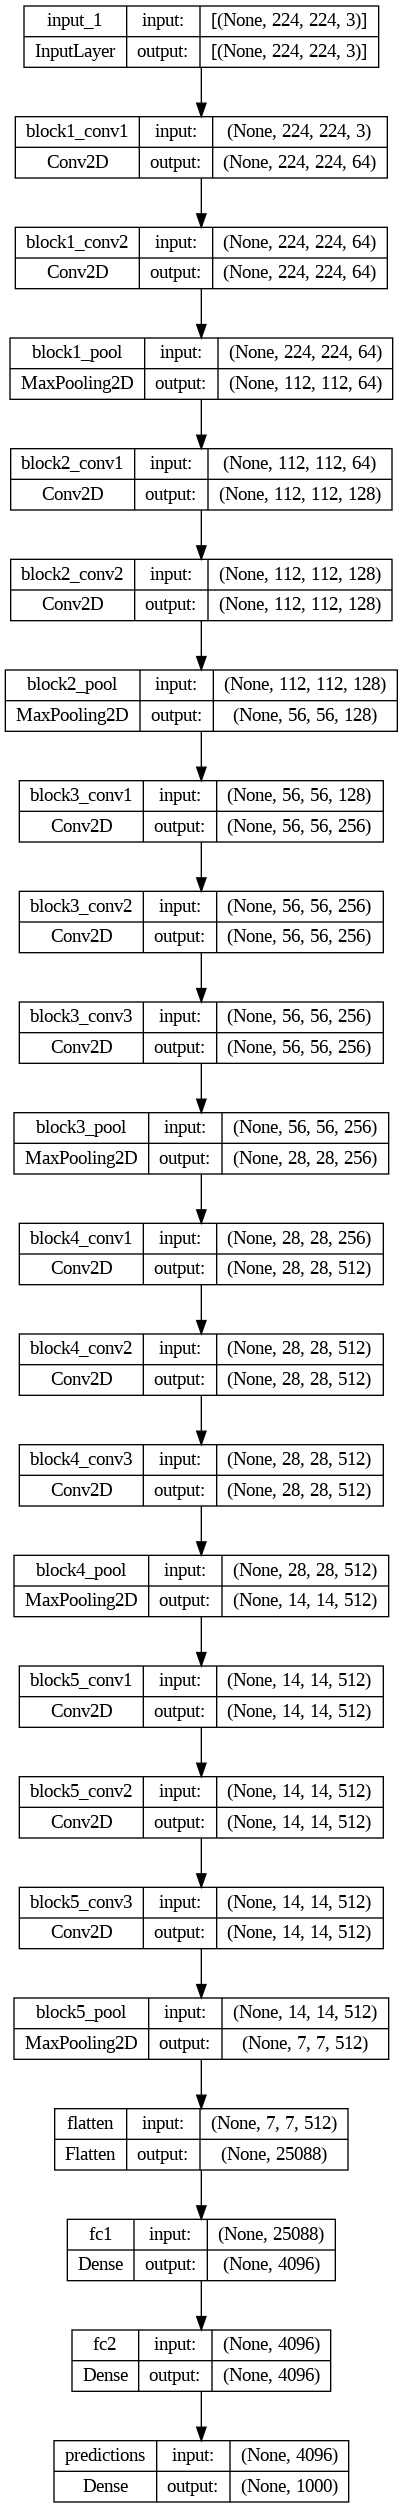

In [5]:
plot_model(model, show_shapes=True, show_layer_names=True)

* 아웃풋 레이어를 보면 노드가 1000개!

* 분류 가능한 이미지가 1000개라는 뜻!

* [**구경하러 가자**](http://image-net.org/challenges/LSVRC/2014/browse-synsets)

# 이미지 파일을 업로드 해둔 곳으로 가자!
---
### **구글 드라이브에 수집한 이미지를 업로드!**
### **순서**
1. 구글링하여 이미지를 수집합니다.
2. **본인의** 구글 드라이브에 my_data 폴더를 생성합니다.
3. my_data 폴더 안에 img1 폴더를 생성합니다.
4. 1번 단계에서 수집한 이미지를 img1 폴더에 업로드 합니다.
5. 30초 정도 기다립시다.
6. 아래의 코드들을 실행합니다.

## Connect Colaboratory with my Google Drive
- Colaboratory와 본인의 구글 드라이브를 연결하는 과정
- 아래 코드를 실행하여 폴더가 올바르게 생성 되었는지 확인

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!ls

drive  model.png  sample_data


In [8]:
!cd /content/drive/MyDrive/my_data; ls

img1  my_mnist


## Load Image
- 업로드 한 이미지 하나를 불러와 확인해본다

In [9]:
import glob
from tensorflow.keras.preprocessing import image

In [10]:
files = glob.glob('/content/drive/MyDrive/my_data/img1/*')
files

['/content/drive/MyDrive/my_data/img1/_119546661_gettyimages-1294130887.jpg',
 '/content/drive/MyDrive/my_data/img1/631904_913996_2133.webp']

preprocess 전: 최대값=255.0, 최소값=0.0
preprocess 후: 최대값=151.06100463867188, 최소값=-123.68000030517578
35363/35363 [==============================] - 0s 0us/step
[[('n02799071', 'baseball', 0.62096566), ('n09835506', 'ballplayer', 0.33109707), ('n04254680', 'soccer_ball', 0.013165729)]]


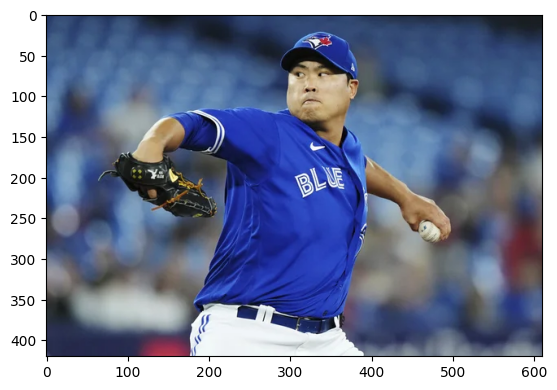

In [11]:
img = image.load_img(files[-1], color_mode='rgb', target_size = (224,224) )
img = image.img_to_array(img)
img = img.reshape((-1,224,224,3))
print(f'preprocess 전: 최대값={np.max(img)}, 최소값={np.min(img)}')

img = preprocess_input(img)
print(f'preprocess 후: 최대값={np.max(img)}, 최소값={np.min(img)}')

features = model.predict(img)
print(decode_predictions(features, top=3))

plt.imshow(image.load_img(files[-1]))
plt.show()

## Load Images
- 업로드 한 이미지 전체를 확인해본다

In [ ]:
images = []

for path in files :
    img = image.load_img(path, grayscale=False, target_size=(224,224) )
    print(img)
    img = image.img_to_array(img)
    print(img)
    img = preprocess_input(img)
    print(img)
    images.append(img)

images = np.array(images)

1/1 [==============================] - 1s 816ms/step
[('n04456115', 'torch', 0.7995585), ('n04039381', 'racket', 0.051304873), ('n02802426', 'basketball', 0.036235344)]


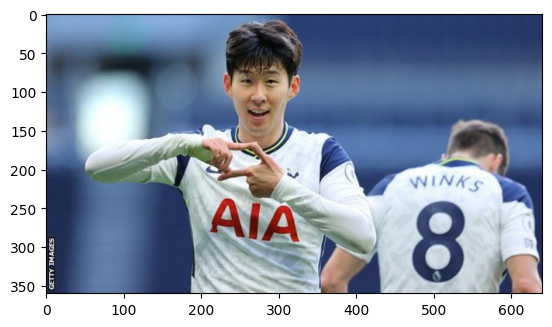

[('n02799071', 'baseball', 0.62096477), ('n09835506', 'ballplayer', 0.33109784), ('n04254680', 'soccer_ball', 0.013165734)]


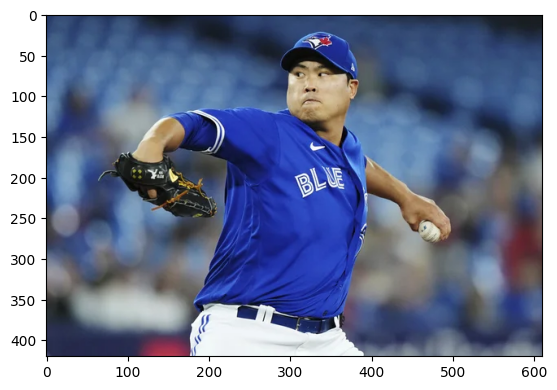

In [13]:
features = model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

# **Easy, but Very Important Exercise!**

* 강아지 이미지를 수집합시다. (다른 것으로 해도 됨.)
* 본인이 판단하기에 잘 될 법한 강아지 이미지 10개를 찾아봅시다.
* 본인이 판단하기에 잘 안 될 법한 강아지 이미지 10개를 찾아봅시다.
---
- **경로 설정**
    1. my_data 폴더 안에 img2 폴더를 생성합니다.
    2. 수집한 이미지를 img2 폴더에 업로드 하세요.

In [17]:
import glob

In [18]:
files = glob.glob('/content/drive/MyDrive/my_data/img2/*')
files

['/content/drive/MyDrive/my_data/img2/puppy-5499401_1280.jpg',
 '/content/drive/MyDrive/my_data/img2/Golde33443.jpg',
 '/content/drive/MyDrive/my_data/img2/dog.jpg',
 '/content/drive/MyDrive/my_data/img2/bordeaux-mastiff-dog-animal-race-lips-skin-making-a-face-mammal-pet.jpg',
 '/content/drive/MyDrive/my_data/img2/78759593.2.jpg',
 '/content/drive/MyDrive/my_data/img2/5123154.jpg',
 '/content/drive/MyDrive/my_data/img2/97239_132481_1691766686.jpg',
 '/content/drive/MyDrive/my_data/img2/1996_tmp_701a141c346e6e35c7de53829228e2568742view.jpg',
 '/content/drive/MyDrive/my_data/img2/201225314_500.jpg',
 '/content/drive/MyDrive/my_data/img2/5399699_L2murlKrhF_1690159250964.png',
 '/content/drive/MyDrive/my_data/img2/9d83e940ad9848e5702f08eee5afe1be_res.jpeg',
 '/content/drive/MyDrive/my_data/img2/7b5253e2894d678cc34a315959ee8e2d.jpg',
 '/content/drive/MyDrive/my_data/img2/73826_65788_3954.jpg',
 '/content/drive/MyDrive/my_data/img2/1620109903215461.jpg',
 '/content/drive/MyDrive/my_data/img2

In [19]:
images = []

for path in files :
    img = image.load_img(path, grayscale=False, target_size=(224,224) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    images.append(img)

images = np.array(images)

In [20]:
features = model.predict(images)
predictions = decode_predictions(features, top=3)

for i in range(images.shape[0]) :
    print(predictions[i])
    plt.imshow(image.load_img(files[i]))
    plt.show()

Output hidden; open in https://colab.research.google.com to view.